
# **INTRODUCTION**

Program ini bertujuan dibuat untuk mendukung kebutuhan analisis dari salah satu perusahaan food and beverages fiksi yang bernama Maven Roasters dengan memanfaatkan data penjualan harian, kategori produk, harga satuan produk, hingga tren konsumsi konsumen. Melalui visualisasi yang interaktif dan laporan berbasis data, kita harapkan perusahaan dapat mudah memahami informasi - informasi yang penting dalam pendukungan program atau strategi promosi yang akan dijalankan. Dengan pendekatan statistika deskriptif, inferensial dan berorientasi pada hasil, program ini diharapkan dapat menjadi fondasi utama dalam pengambilan keputusan bisnis perusahaan.

link Tableau: https://public.tableau.com/views/milestone_17453580275920/AstoriaSalesAnalytics?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

---

# **IDENTIFIKASI MASALAH**

**LATAR BELAKANG**

Data yang dipakai merupakan data dari salah satu perusahaan yang bergerak dibidang food and beverage fiksi yang bernama Maven roasters. Data ini diambil dari website online bernama kaggle. Maven Roaster memiliki tiga cabang toko masing masing di Lower Manhattan, Hell's Kitchen, dan Astoria. Maven Roasters menyediakan beberapa category produk seperti penjualan coffee, tea, bakery, minuman alkohol ,dan sebagainya. Masing masing category produk, memiliki tim masaknya masing masing. Maven Roasters ingin melakukan penaikan sales produk pada bidang category yang paling lemah khususnya di cabang toko Astoria. Cabang Astoria berencana untuk mengevaluasi resep masakan/minuman nya untuk menaikan penjualan produk.

link dataset: https://www.kaggle.com/datasets/ahmedabbas757/coffee-sales/data

**PROBLEM STATEMENT:**

Dalam industri food and beverages yang semakin lama semakin kompetitif, Kita perlu aware dengan strategi penjualan yang kita miliki. Mulai dari sistem penjualan hingga resep masakan dan minuman yang kita sajikan untuk customer kita. Astoria ingin mengoptimalkan resep masakan/minuman untuk penjualan produk yang category nya paling lemah, sehingga minimal penjualan category tersebut meningkat 10% dalam waktu 1 tahun.

**SMART FRAMEWORK:**

SPECIFIC = meningkatkan penjualan dari produk yang category nya paling lemah dengan cara evaluasi resep makanan/minuman yang dimiliki.

MEASURABLE = meningkatkan penjualan dari category produk tersebut sebanyak 10%

ACHIEVABLE = mengetahui category produk mana yang terjual paling rendah

RELEVANT = evaluasi resep makanan berguna untuk meningkatkan penjualan produk.

TIME-BOUND = Dalam waktu 1 tahun, Astoria dapat meningkatkan sales categori produk terlemah nya sebesar 10%



------------------------------------------------------------------------------------------------------------------------------------------------------

5W + 1H:

- Tipe Produk apa yang paling tidak laku di cabang Astoria?
- Berapa total penjualan produk dari setiap tipe produk di cabang Astoria?
- Apakah kategori produk mempengaruhi harga dari produk tersebut?
- Berapa persentase penjualan produk chocolate dari seluruh total penjualan?
- Bagaimana mengenai trend penjualan produk coffee pada cabang toko astoria?
- Bagaimana penyebaran data harga kopi pada cabang toko astoria?

--------------------------------------------------------------------------------------------------------------------------------------------------

# **DATA LOADING**

Dataset ini merekam data yang berkaitan dengan detail produk seperti tanggal transaksi, detail produk, kategori produk, dan lokasi penjualan. Data yang diambil merupakan seluruh data transaksi pada bulan januari 2023 hingga juni 2023 dari Maven Roasters. Namun kita hanya mengambil data transaksi pada bulan januari 2023 dan akan dijadikan landasan penentuan hipotesis dan perhitungan statistika lainnya.

In [36]:
# import library
import pandas as pd 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# pembuatan dataframe dari 17315 baris pertama diambil dari file excel bernama Coffee Shop Sales (karena pada bulan januari hanya terjadi 17315 transaksi)
df= pd.read_excel('P0M1_Stanley_Armando_dataset.xlsx').head(17315)

# pembuatan dataframe baru bernama astoria berisi seluruh data dari cabang toko astoria.
astoria= df[df['store_location'] == 'Astoria'].reset_index()
astoria

,index,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,105,106,2023-01-01,11:01:48,1,3,Astoria,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
1,106,107,2023-01-01,11:01:58,1,3,Astoria,38,3.75,Coffee,Barista Espresso,Latte
2,107,108,2023-01-01,11:01:58,1,3,Astoria,75,3.50,Bakery,Pastry,Croissant
3,111,112,2023-01-01,11:08:11,1,3,Astoria,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
4,113,114,2023-01-01,11:09:01,1,3,Astoria,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
...,...,...,...,...,...,...,...,...,...,...,...,...
5908,17306,17336,2023-01-31,19:47:25,1,3,Astoria,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
5909,17307,17337,2023-01-31,19:47:25,1,3,Astoria,10,10.00,Coffee beans,Green beans,Guatemalan Sustainably Grown
5910,17308,17338,2023-01-31,19:52:59,1,3,Astoria,40,3.75,Coffee,Barista Espresso,Cappuccino
5911,17309,17339,2023-01-31,19:53:46,1,3,Astoria,24,3.00,Coffee,Drip coffee,Our Old Time Diner Blend Lg


Penjelasan Nama Kolom:

- **transaction_id:** Id yang mempresentasikan transaksi (individual transaction).
- **transaction_date:** Tanggal transaksi (YYYY-MM-DD)
- **transaction_time:** Jam transaksi (HH:MM:SS)
- **transaction_qty:** Jumlah produk yang terjual
- **store_id:** Id unik cabang Maven Roasters
- **store_location:** lokasi tempat cabang Maven Roasters 
- **product_id:** Id unik yang mempresentasikan produk
- **unit_price:** Harga dari produk 
- **product_category:** Kategori produk 
- **product_type:** Tipe produk
- **product_detail:** Detail produk 

**Penjelasan Data Loading:**

Dari 17315 baris data, Kita hanya mengambiil data transaksi dari cabang toko Astoria. Data tersebut berjumlah 5913. Dari sini kita dapat kesimpulan bahwa pada bulan januari 2023, cabang toko astoria berhasil melakukan 5913 transaksi.

In [37]:
# drop duplicate dari dataframe astoria
astoria = astoria.drop_duplicates()
astoria

,index,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,105,106,2023-01-01,11:01:48,1,3,Astoria,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
1,106,107,2023-01-01,11:01:58,1,3,Astoria,38,3.75,Coffee,Barista Espresso,Latte
2,107,108,2023-01-01,11:01:58,1,3,Astoria,75,3.50,Bakery,Pastry,Croissant
3,111,112,2023-01-01,11:08:11,1,3,Astoria,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
4,113,114,2023-01-01,11:09:01,1,3,Astoria,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
...,...,...,...,...,...,...,...,...,...,...,...,...
5908,17306,17336,2023-01-31,19:47:25,1,3,Astoria,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
5909,17307,17337,2023-01-31,19:47:25,1,3,Astoria,10,10.00,Coffee beans,Green beans,Guatemalan Sustainably Grown
5910,17308,17338,2023-01-31,19:52:59,1,3,Astoria,40,3.75,Coffee,Barista Espresso,Cappuccino
5911,17309,17339,2023-01-31,19:53:46,1,3,Astoria,24,3.00,Coffee,Drip coffee,Our Old Time Diner Blend Lg


Dari hasil ini kita dapat menyimpulkan bahwa tidak ada data duplicate karena baris dari sebelum dan sesudah dilakukan drop_duplicate sama yaitu 5913 baris.

**Kesimpulan Data Loading:**

Berhasil mengambil semua data dari cabang toko astoria dan dimasukkan kedalam dataframe yang bernama astoria dan tidak menemukan adanya duplicate data.

==========================================================================================

# **DATA CLEANING**

Langkah ini bertujuan untuk mempersiapkan data berupa data cleaning sebelum dilakukan eksplorasi data lebih dalam. Langkah ini dapat mempermudah pengolahan data.

In [38]:
# cek missing value dari setiap kolom yang ada di astoria
astoria.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5913 entries, 0 to 5912
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             5913 non-null   int64         
 1   transaction_id    5913 non-null   int64         
 2   transaction_date  5913 non-null   datetime64[ns]
 3   transaction_time  5913 non-null   object        
 4   transaction_qty   5913 non-null   int64         
 5   store_id          5913 non-null   int64         
 6   store_location    5913 non-null   object        
 7   product_id        5913 non-null   int64         
 8   unit_price        5913 non-null   float64       
 9   product_category  5913 non-null   object        
 10  product_type      5913 non-null   object        
 11  product_detail    5913 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 600.5+ KB


Dari hasil ini kita dapat menyimpulkan tidak ada missing value, karena dari 5913 baris seluruh kolom mengandung 5913 non-null value.

In [39]:
# menghapus kolom yang tidak terpakai
cleaned_astoria = astoria.loc[:,['transaction_date', 'transaction_qty', 'product_id', 'unit_price', 'product_category', 'product_type', 'product_detail']]
cleaned_astoria

,transaction_date,transaction_qty,product_id,unit_price,product_category,product_type,product_detail
0,2023-01-01,1,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
1,2023-01-01,1,38,3.75,Coffee,Barista Espresso,Latte
2,2023-01-01,1,75,3.50,Bakery,Pastry,Croissant
3,2023-01-01,1,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
4,2023-01-01,1,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
...,...,...,...,...,...,...,...
5908,2023-01-31,1,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
5909,2023-01-31,1,10,10.00,Coffee beans,Green beans,Guatemalan Sustainably Grown
5910,2023-01-31,1,40,3.75,Coffee,Barista Espresso,Cappuccino
5911,2023-01-31,1,24,3.00,Coffee,Drip coffee,Our Old Time Diner Blend Lg


Dalam langkah ini ada 3 kolom yang dihapus karena tidak berhubungan dengan tujuan analisa. Kolom yang dihapus adalah kolom transaction_time, store_id, dan store_location. Kolom transaction_time dihapus karena tidak ada hubungannya dengan tujuan analisa yaitu meningkatkan penjualan kategori terlemah. Kolom store_id dan store_location dihapus karena kedua kolom tersebut tidak informatif. Berhubung data yang diolah adalah data penjualan produk dari cabang kota Astoria, maka untuk store_id akan selalu berisi nilai yang sama yaitu angka 3, dan store_location akan selalu berisi astoria.

In [40]:
# penambahan kolom baru
cleaned_astoria['total_price'] = cleaned_astoria['transaction_qty']*cleaned_astoria['unit_price']
cleaned_astoria

,transaction_date,transaction_qty,product_id,unit_price,product_category,product_type,product_detail,total_price
0,2023-01-01,1,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00
1,2023-01-01,1,38,3.75,Coffee,Barista Espresso,Latte,3.75
2,2023-01-01,1,75,3.50,Bakery,Pastry,Croissant,3.50
3,2023-01-01,1,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,4.50
4,2023-01-01,1,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,4.50
...,...,...,...,...,...,...,...,...
5908,2023-01-31,1,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,3.00
5909,2023-01-31,1,10,10.00,Coffee beans,Green beans,Guatemalan Sustainably Grown,10.00
5910,2023-01-31,1,40,3.75,Coffee,Barista Espresso,Cappuccino,3.75
5911,2023-01-31,1,24,3.00,Coffee,Drip coffee,Our Old Time Diner Blend Lg,3.00


Pembuatan kolom baru bernama total_price yang menampung nilai dari total uang yang dibayarkan pada transaksi tersebut. Nilai ini didapatkan dari nilai transaction_qty dikalikan dengan unit_price.

**Kesimpulan Data Cleaning:**

Proses Data Cleaning memiliki tiga langkah yaitu mencari nilai null value (mau dilakukan handling data null). Namun karena data awal sudah bersih, maka handling null value tidak dilakukan dalam langkah ini. Lalu selanjutnya menghilangkan 3 kolom yang tidak informatif dan menambahkan kolom total_price sebagai total uang yang dibayarkan per transaksi.

============================================================================================================================================================

# **DATA EXPLORATION AND ANALYSIS**

Proses data exploration dan analisis bertujuan untuk menampilkan hasil analisis, penjelasan analisis, perhitungan statistik deskriptif dan inferensial, serta pembuatan visualisasi data. 

## 1. Statistik Deskriptif 

Statistik Deskriptif bertujuan untuk mencari nilai central tendency seperti nilai rata  - rata dan nilai tengah lalu mencari nilai total transaksi per kategori. Pada proses ini juga akan menjawab pertanyaan pertama yaitu

**Tipe produk apa yang paling tidak laku di cabang Astoria?**

In [41]:
# menampilkan data yang sudah di clean
cleaned_astoria

,transaction_date,transaction_qty,product_id,unit_price,product_category,product_type,product_detail,total_price
0,2023-01-01,1,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00
1,2023-01-01,1,38,3.75,Coffee,Barista Espresso,Latte,3.75
2,2023-01-01,1,75,3.50,Bakery,Pastry,Croissant,3.50
3,2023-01-01,1,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,4.50
4,2023-01-01,1,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,4.50
...,...,...,...,...,...,...,...,...
5908,2023-01-31,1,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,3.00
5909,2023-01-31,1,10,10.00,Coffee beans,Green beans,Guatemalan Sustainably Grown,10.00
5910,2023-01-31,1,40,3.75,Coffee,Barista Espresso,Cappuccino,3.75
5911,2023-01-31,1,24,3.00,Coffee,Drip coffee,Our Old Time Diner Blend Lg,3.00


In [42]:
# mencari jumllah total transaksi per produk kategori
sum_df= cleaned_astoria.groupby('product_category')['transaction_qty'].sum().reset_index()
sum_df

,product_category,transaction_qty
0,Bakery,872
1,Branded,42
2,Coffee,3435
3,Coffee beans,59
4,Drinking Chocolate,757
5,Flavours,271
6,Loose Tea,43
7,Packaged Chocolate,15
8,Tea,2787


Dari hasil tabel diatas, kita dapat menentukkan bahwa category dari cabang toko astoria tersebut memiliki 4 section produk utama yaitu tim bakery, tim coffee, tim chocolate, dan tim tea. Produk selain itu seperti Branded dan Flavour akan diabaikan karena tidak termasuk kedalam 4 section utama yang berencana di boost penjualannya. Pembahasan data transaksi branded dan flavours akan ditampilkan dibawah ini.


In [43]:
# menampilkan data flavours
cleaned_astoria[cleaned_astoria['product_category'] == 'Flavours']

,transaction_date,transaction_qty,product_id,unit_price,product_category,product_type,product_detail,total_price
1656,2023-01-10,2,64,0.8,Flavours,Regular syrup,Hazelnut syrup,1.6
1669,2023-01-10,2,63,0.8,Flavours,Regular syrup,Carmel syrup,1.6
1680,2023-01-10,1,65,0.8,Flavours,Sugar free syrup,Sugar Free Vanilla syrup,0.8
1684,2023-01-10,2,63,0.8,Flavours,Regular syrup,Carmel syrup,1.6
1707,2023-01-10,2,84,0.8,Flavours,Regular syrup,Chocolate syrup,1.6
...,...,...,...,...,...,...,...,...
5753,2023-01-31,1,65,0.8,Flavours,Sugar free syrup,Sugar Free Vanilla syrup,0.8
5774,2023-01-31,2,64,0.8,Flavours,Regular syrup,Hazelnut syrup,1.6
5787,2023-01-31,1,65,0.8,Flavours,Sugar free syrup,Sugar Free Vanilla syrup,0.8
5791,2023-01-31,1,64,0.8,Flavours,Regular syrup,Hazelnut syrup,0.8


Kategori produk dari flavour berisi tentang data penjualan beragam gula seperti hazelnut syrup, vanilla syrup, carmel syrup dan sebagainya. Maka dari itu, tidak dimasukkan kedalam 4 section penting seperti kopi, teh, bakery dan chocolate.

In [44]:
# menampilkan data branded
cleaned_astoria[cleaned_astoria['product_category'] == 'Branded'].head(10)

,transaction_date,transaction_qty,product_id,unit_price,product_category,product_type,product_detail,total_price
1484,2023-01-08,1,83,14.0,Branded,Housewares,I Need My Bean! Latte cup,14.0
1831,2023-01-10,1,82,12.0,Branded,Housewares,I Need My Bean! Diner mug,12.0
1942,2023-01-11,1,83,14.0,Branded,Housewares,I Need My Bean! Latte cup,14.0
1975,2023-01-11,1,82,12.0,Branded,Housewares,I Need My Bean! Diner mug,12.0
1980,2023-01-11,1,83,14.0,Branded,Housewares,I Need My Bean! Latte cup,14.0
2012,2023-01-11,1,82,12.0,Branded,Housewares,I Need My Bean! Diner mug,12.0
2015,2023-01-11,1,83,14.0,Branded,Housewares,I Need My Bean! Latte cup,14.0
2360,2023-01-14,1,81,28.0,Branded,Clothing,I Need My Bean! T-shirt,28.0
2410,2023-01-14,1,81,28.0,Branded,Clothing,I Need My Bean! T-shirt,28.0
2470,2023-01-14,1,83,23.0,Branded,Housewares,I Need My Bean! Latte cup,23.0


Kategori produk dari Branded berisi tentang berbagai macam merchandise seperti mug, cup, t-shirt dan sebagainya. Maka dari itu, tidak dimasukkan 4 section penting seperti kopi, teh, bakery dan chocolate.

----------------------------------------------------------------------

### Section A (Bakery)

Kategori bakery berisi data transaksi yang berhubungan dengan bakery.

In [45]:
bakery= cleaned_astoria[cleaned_astoria['product_category'] == 'Bakery'].reset_index()
bakery= bakery.drop('index', axis=1)
bakery.head(10)

,transaction_date,transaction_qty,product_id,unit_price,product_category,product_type,product_detail,total_price
0,2023-01-01,1,75,3.50,Bakery,Pastry,Croissant,3.50
1,2023-01-01,1,79,3.75,Bakery,Scone,Jumbo Savory Scone,3.75
2,2023-01-01,1,79,3.75,Bakery,Scone,Jumbo Savory Scone,3.75
3,2023-01-01,1,75,3.50,Bakery,Pastry,Croissant,3.50
4,2023-01-01,1,75,3.50,Bakery,Pastry,Croissant,3.50
5,2023-01-01,1,69,3.25,Bakery,Biscotti,Hazelnut Biscotti,3.25
6,2023-01-01,1,79,3.75,Bakery,Scone,Jumbo Savory Scone,3.75
7,2023-01-01,1,70,3.25,Bakery,Scone,Cranberry Scone,3.25
8,2023-01-01,1,76,3.50,Bakery,Biscotti,Chocolate Chip Biscotti,3.50
9,2023-01-01,1,69,3.25,Bakery,Biscotti,Hazelnut Biscotti,3.25


Ini adalah sample dari 10 data transaksi bakery teratas.

In [46]:
# Penentuan Nilai mean dan median dari data transaksi bakery.
bakery_mean = stats.tmean(bakery['total_price'])
bakery_median = np.median(bakery['total_price'])
bakery_transaction= sum(bakery['transaction_qty'])
print(f'Nilai rata rata dari total penjualan bakery: {bakery_mean}')
print(f'Nilai tengah dari total penjualan bakery: {bakery_median}')
print(f'Total penjualan produk bakery: {bakery_transaction}')

Nilai rata rata dari total penjualan bakery: 3.65
Nilai tengah dari total penjualan bakery: 3.5
Total penjualan produk bakery: 872


--------------------------------------------------------------------------------------------------

### SECTION B (Coffee)

Kategori coffee berisi data transaksi tentang coffee. Data ini meliputi data transaksi coffee dan coffee beans. Ini karena penjualan coffee dan coffee beans masih under satu management. 

In [47]:
coffee= cleaned_astoria[cleaned_astoria['product_category'].isin(['Coffee','Coffee beans'])].reset_index()
coffee= coffee.drop('index', axis=1)
coffee.head(10)

,transaction_date,transaction_qty,product_id,unit_price,product_category,product_type,product_detail,total_price
0,2023-01-01,1,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00
1,2023-01-01,1,38,3.75,Coffee,Barista Espresso,Latte,3.75
2,2023-01-01,2,33,3.50,Coffee,Gourmet brewed coffee,Ethiopia Lg,7.00
3,2023-01-01,2,25,2.20,Coffee,Organic brewed coffee,Brazilian Sm,4.40
4,2023-01-01,1,30,3.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast Lg,3.00
5,2023-01-01,2,26,3.00,Coffee,Organic brewed coffee,Brazilian Rg,6.00
6,2023-01-01,2,36,3.75,Coffee,Premium brewed coffee,Jamaican Coffee River Lg,7.50
7,2023-01-01,2,37,3.00,Coffee,Barista Espresso,Espresso shot,6.00
8,2023-01-01,2,35,3.10,Coffee,Premium brewed coffee,Jamaican Coffee River Rg,6.20
9,2023-01-01,2,28,2.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm,4.00


Ini adalah sample dari 10 data transaksi coffee teratas.

In [48]:
# Penentuan Nilai mean dan median dari data transaksi coffee.
coffee_mean = stats.tmean(coffee['total_price'])
coffee_median = np.median(coffee['total_price'])
coffee_transaction= sum(coffee['transaction_qty'])
print(f'Nilai rata rata dari total penjualan coffee: {coffee_mean}')
print(f'Nilai tengah dari total penjualan coffee: {coffee_median}')
print(f'Total penjualan produk coffee: {coffee_transaction}')

Nilai rata rata dari total penjualan coffee: 4.894159663865547
Nilai tengah dari total penjualan coffee: 4.0
Total penjualan produk coffee: 3494


----------------------------------------------------------------------------------------------------------------

### SECTION C (Chocolate)

Kategori Chocolate berisi data transaksi tentang chocolate. Data ini meliputi data transaksi drinking chocolate dan packaged chocolate. Ini karena penjualan drinking chocolate dan package chocolate masih under satu management. 

In [49]:
chocolate= cleaned_astoria[cleaned_astoria['product_category'].isin(['Drinking Chocolate','Packaged Chocolate'])].reset_index()
chocolate= chocolate.drop('index', axis=1)
chocolate.head(10)

,transaction_date,transaction_qty,product_id,unit_price,product_category,product_type,product_detail,total_price
0,2023-01-01,1,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,4.50
1,2023-01-01,1,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,4.50
2,2023-01-01,1,60,3.75,Drinking Chocolate,Hot chocolate,Sustainably Grown Organic Rg,3.75
3,2023-01-01,2,60,3.75,Drinking Chocolate,Hot chocolate,Sustainably Grown Organic Rg,7.50
4,2023-01-01,2,60,3.75,Drinking Chocolate,Hot chocolate,Sustainably Grown Organic Rg,7.50
5,2023-01-01,1,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,4.50
6,2023-01-01,1,61,4.75,Drinking Chocolate,Hot chocolate,Sustainably Grown Organic Lg,4.75
7,2023-01-01,1,58,3.50,Drinking Chocolate,Hot chocolate,Dark chocolate Rg,3.50
8,2023-01-01,2,58,3.50,Drinking Chocolate,Hot chocolate,Dark chocolate Rg,7.00
9,2023-01-01,2,58,3.50,Drinking Chocolate,Hot chocolate,Dark chocolate Rg,7.00


Ini adalah sample dari 10 data transaksi chocolate teratas.

In [50]:
# Penentuan Nilai mean dan median dari data transaksi chocolate.
chocolate_mean = stats.tmean(chocolate['total_price'])
chocolate_median = np.median(chocolate['total_price'])
chocolate_transaction= sum(chocolate['transaction_qty'])
print(f'Nilai rata rata dari total penjualan chocolate: {chocolate_mean}')
print(f'Nilai tengah dari total penjualan chocolate: {chocolate_median}')
print(f'Total penjualan produk chocolate: {chocolate_transaction}')

Nilai rata rata dari total penjualan chocolate: 6.229694656488549
Nilai tengah dari total penjualan chocolate: 7.0
Total penjualan produk chocolate: 772


----------------------------------------------------------------------------------------------------------------

### SECTION D (Tea)

Kategori Tea berisi data transaksi tentang Tea. Data ini meliputi data transaksi Tea dan Loose Tea. Ini karena penjualan Tea dan Loose Tea masih under satu management. 

In [51]:
tea= cleaned_astoria[cleaned_astoria['product_category'].isin(['Tea','Loose Tea'])].reset_index()
tea= tea.drop('index', axis=1)
tea.head(10)

,transaction_date,transaction_qty,product_id,unit_price,product_category,product_type,product_detail,total_price
0,2023-01-01,1,47,3.0,Tea,Brewed Green tea,Serenity Green Tea Lg,3.0
1,2023-01-01,1,46,2.5,Tea,Brewed Green tea,Serenity Green Tea Rg,2.5
2,2023-01-01,1,43,3.0,Tea,Brewed herbal tea,Lemon Grass Lg,3.0
3,2023-01-01,2,45,3.0,Tea,Brewed herbal tea,Peppermint Lg,6.0
4,2023-01-01,2,49,3.0,Tea,Brewed Black tea,English Breakfast Lg,6.0
5,2023-01-01,2,52,2.5,Tea,Brewed Chai tea,Traditional Blend Chai Rg,5.0
6,2023-01-01,1,50,2.5,Tea,Brewed Black tea,Earl Grey Rg,2.5
7,2023-01-01,2,49,3.0,Tea,Brewed Black tea,English Breakfast Lg,6.0
8,2023-01-01,1,44,2.5,Tea,Brewed herbal tea,Peppermint Rg,2.5
9,2023-01-01,2,52,2.5,Tea,Brewed Chai tea,Traditional Blend Chai Rg,5.0


Ini adalah sample dari 10 data transaksi tea teratas.

In [52]:
# Penentuan Nilai mean dan median dari data transaksi teaa.
tea_mean = stats.tmean(tea['total_price'])
tea_median = np.median(tea['total_price'])
tea_transaction= sum(tea['transaction_qty'])
print(f'Nilai rata rata dari total penjualan tea: {tea_mean}')
print(f'Nilai tengah dari total penjualan tea: {tea_median}')
print(f'Total penjualan produk tea: {tea_transaction}')

Nilai rata rata dari total penjualan tea: 4.24568921011874
Nilai tengah dari total penjualan tea: 4.0
Total penjualan produk tea: 2830


------------------------------------------------------------------------------------------------------------------------------

**Ringkasan temuan Bagian Statistik Deskriptif:**

Dari hasil analisa statistik deskriptif diatas maka kita dapat kesimpulan bahwa penjualan produk terbanyak adalah dari section coffee dan yang terkecil adalah chocolate dengan urutan berikut:
1. Coffee Section - 3494 product sold
2. Tea Section - 2830 product sold
3. Bakery Section - 872 product sold
4. Chocolate Section - 772 product sold

Data ini menjawab pertanyaan pertama yaitu Tipe Produk apa yang paling tidak laku di cabang Astoria?

**Jawaban:** Chocolate

Dari hasil analisa statistik deskriptif diatas maka kita dapat kesimpulan bahwa nilai rata - rata per transaksi terbesar adalah dari section chocolate dan yang terkecil adalah bakery dengan urutan berikut:
1. Chocolate Section - 6.22 dollar
2. Coffee Section - 4.89 dollar
3. Tea Section - 4.24 dollar
4. Bakery Section - 3.65 dollar

Dari data ini kita dapat menyimpulkan walaupun chocolate adalah produk yang paling sedikit terjual, namun rata - rata total_price dari transaksi chocolate adalah paling tinggi per transaksinya. Ini berarti perbon penjualan chocolate memberikan pemasukan yang paling tinggi diantara 3 section lainnya.

==================================================================================================================================

## 2. Visualisasi Data Menggunakan Bar Chart

Proses ini bertujuan untuk menampilkan jumlah penjualan dari masing masing tipe produk dalam setiap kategorinya pada toko cabang astoria menggunakan bar chart. Pada proses ini juga kita akan menjawab pertanyaan kedua yaitu

**Berapa total penjualan setiap produk dari masing - masing kategori di cabang Astoria?**

------------------------------------------------------------------------------------------------------------------------

### Section A (Bakery)

Data visualisasi pada bakery akan menampilkan jumlah produk yang terjual dari masing masing produk yang ada di dalam kategori bakery.

In [53]:
# menampilkan data yang mau di visualisasikan menggunakan bar chart
bakery_qty= bakery.groupby('product_type')['transaction_qty'].sum().reset_index()
bakery_qty

,product_type,transaction_qty
0,Biscotti,228
1,Pastry,253
2,Scone,391


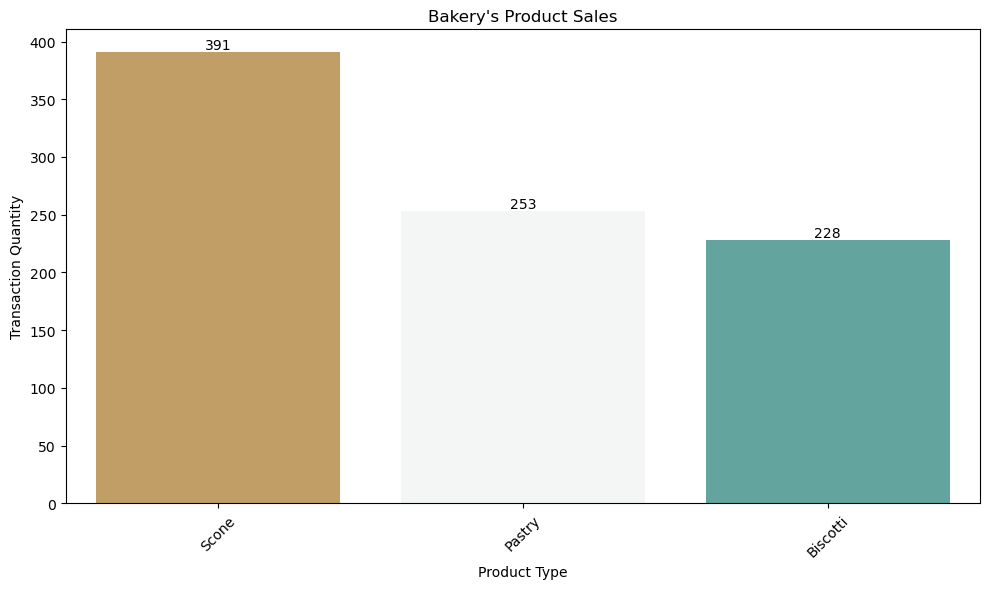

In [54]:
bakery_qty_sorted = bakery_qty.sort_values("transaction_qty", ascending=False)

plt.figure(figsize=(10, 6))

# Plot bar chart
bars = sns.barplot(
    data=bakery_qty_sorted,
    x="product_type",
    y="transaction_qty",
    palette="BrBG" 
)

# Tambahkan nilai di atas bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom'
    )

# Judul dan label
plt.title("Bakery's Product Sales")
plt.xlabel("Product Type")
plt.ylabel("Transaction Quantity")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Temuan dari visualisasi diatas:**

Penjualan product dari section bakery tergolong relatif imbang dibanding section lainnya. Penjualan produk dari tipe produk scone adalah yang tertinggi dengan 391 penjualan produk. Sementara penjualan produk dari tipe produk Biscotti adalah yang terendah sebnayak 228 produk.

-----------------------------------------------------------------------------------------------

### Section B (Coffee)

Data visualisasi pada coffee akan menampilkan jumlah produk yang terjual dari masing masing produk yang ada di dalam kategori coffee.

In [55]:
coffee_qty = coffee.groupby('product_type')['transaction_qty'].sum().reset_index()
coffee_qty

,product_type,transaction_qty
0,Barista Espresso,844
1,Drip coffee,508
2,Espresso Beans,16
3,Gourmet Beans,12
4,Gourmet brewed coffee,1038
5,Green beans,5
6,House blend Beans,5
7,Organic Beans,8
8,Organic brewed coffee,530
9,Premium Beans,13


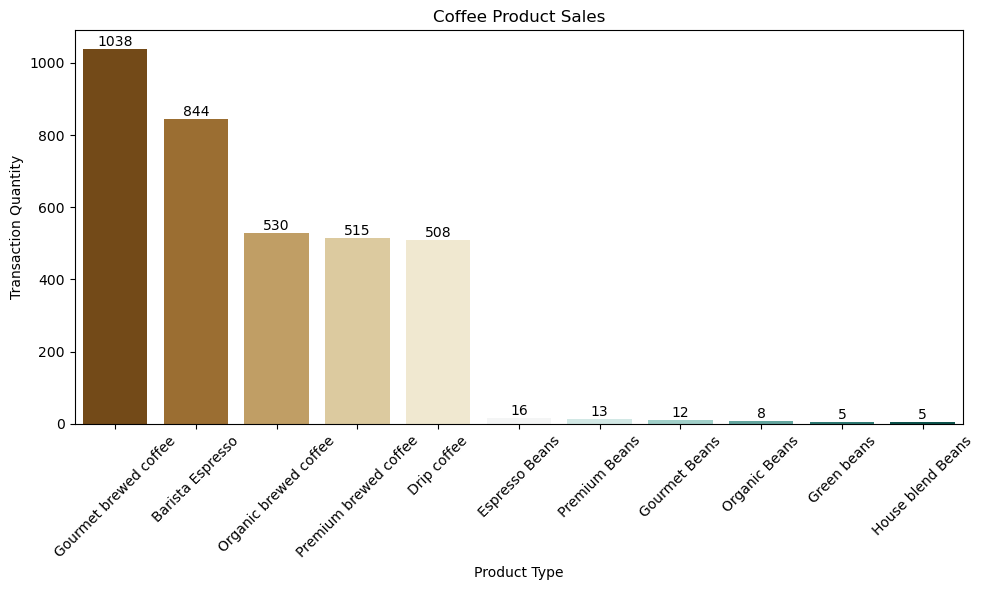

In [56]:
# Urutkan berdasarkan jumlah transaksi agar tampilannya rapi
coffee_qty_sorted = coffee_qty.sort_values("transaction_qty", ascending=False)

# Set ukuran plot
plt.figure(figsize=(10, 6))

# Buat bar chart
bars = sns.barplot(
    data=coffee_qty_sorted,
    x="product_type",
    y="transaction_qty",
    palette="BrBG"  # Palet warna divergen mirip dengan Plotly
)

# Tambahkan label nilai di atas tiap bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom'
    )

# Tambahkan judul dan label
plt.title("Coffee Product Sales")
plt.xlabel("Product Type")
plt.ylabel("Transaction Quantity")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Temuan dari visualisasi diatas:**

Penjualan product dari section coffee sangatlah beragam dan memiliki nilai range data yang luas. Dapat diketahui bahwa penjualan produk dengan tipe produk gourmet brewed coffee adalah yang terbanyak dengan 1038 produk, lalu penjualan tipe produk biji kopi green beans menempati posisi terendah dengan jumlah masing masing 5 penjualan produk.

------------------------------------------------------------------------------------------------------------------------------

### Section C (Chocolate)

Data visualisasi pada chocolate akan menampilkan jumlah produk yang terjual dari masing masing produk yang ada di dalam kategori chocolate.

In [57]:
# menampilkan data yang mau di visualisasikan menggunakan bar chart
chocolate_qty= chocolate.groupby('product_type')['transaction_qty'].sum().reset_index()
chocolate_qty

,product_type,transaction_qty
0,Drinking Chocolate,7
1,Hot chocolate,757
2,Organic Chocolate,8


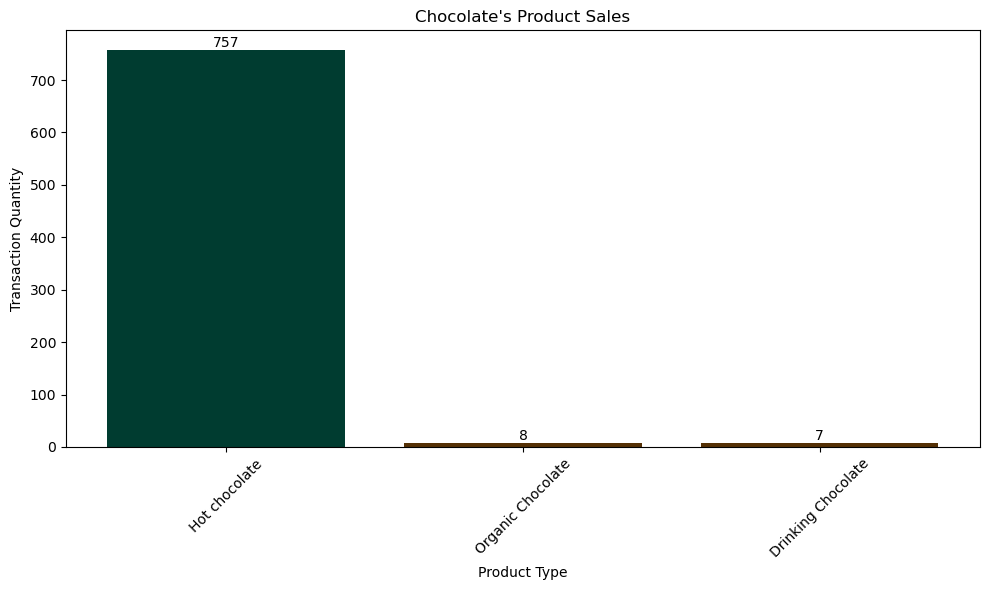

In [58]:
# Urutkan data agar tampilan lebih rapi (opsional)
chocolate_qty_sorted = chocolate_qty.sort_values("transaction_qty", ascending=False)

# Normalisasi untuk pewarnaan berdasarkan nilai (mirip color_continuous_scale)
norm = plt.Normalize(chocolate_qty_sorted['transaction_qty'].min(), chocolate_qty_sorted['transaction_qty'].max())
colors = plt.cm.BrBG(norm(chocolate_qty_sorted['transaction_qty']))

# Ukuran figure
plt.figure(figsize=(10, 6))

# Plot bar chart dengan warna berdasarkan nilai
bars = plt.bar(
    chocolate_qty_sorted["product_type"],
    chocolate_qty_sorted["transaction_qty"],
    color=colors
)

# Tambahkan teks otomatis di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom'
    )

# Tambahkan judul dan label
plt.title("Chocolate's Product Sales")
plt.xlabel("Product Type")
plt.ylabel("Transaction Quantity")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Temuan dari visualisasi diatas:**

Penjualan product dari section chocolate tidak beragam dan berbeda signifikan antara tipe produknya. Hot chocolate adalah tipe produk penjualan terbanyak dengan jumlah 757 produk terjual. Sementara drinking chocolate dan organic chocolate secara berurutan hanya berhasil menjual sebanyak 7 produk dan 8 produk.

------------------------------------------------------------------------------------------------------------------------------

### Section D (Tea)

Data visualisasi pada tea akan menampilkan jumlah produk yang terjual dari masing masing produk yang ada di dalam kategori tea.

In [59]:
# menampilkan data yang mau di visualisasikan menggunakan bar chart
tea_qty= tea.groupby('product_type')['transaction_qty'].sum().reset_index()
tea_qty

,product_type,transaction_qty
0,Black tea,9
1,Brewed Black tea,680
2,Brewed Chai tea,1083
3,Brewed Green tea,340
4,Brewed herbal tea,684
5,Chai tea,14
6,Green tea,6
7,Herbal tea,14


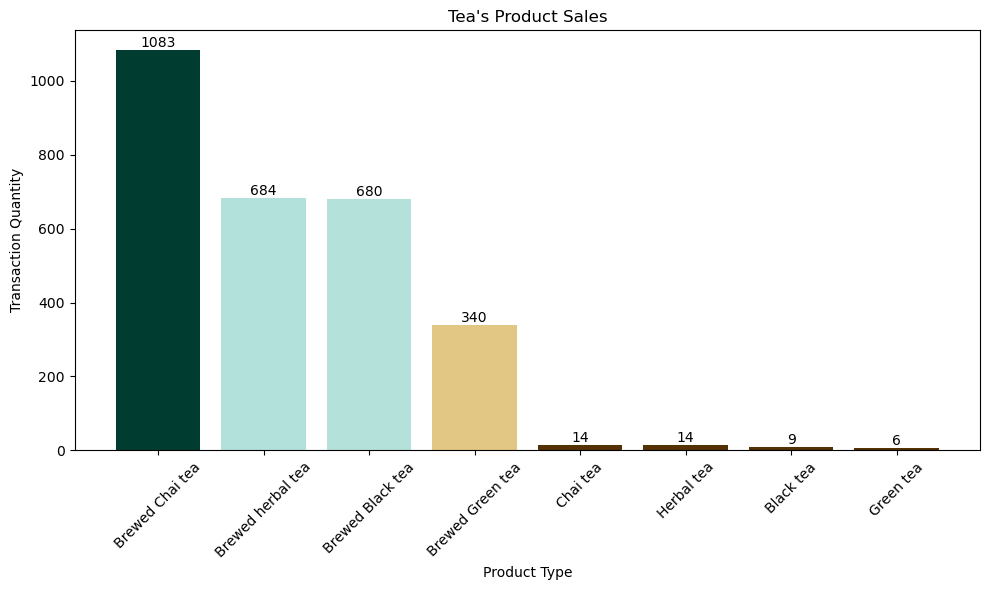

In [66]:
# Urutkan berdasarkan jumlah agar rapi (opsional)
tea_qty_sorted = tea_qty.sort_values("transaction_qty", ascending=False)

# Normalisasi nilai untuk colormap gradasi warna
norm = plt.Normalize(tea_qty_sorted['transaction_qty'].min(), tea_qty_sorted['transaction_qty'].max())
colors = plt.cm.BrBG(norm(tea_qty_sorted['transaction_qty']))

# Ukuran figure
plt.figure(figsize=(10, 6))

# Plot bar chart
bars = plt.bar(
    tea_qty_sorted["product_type"],
    tea_qty_sorted["transaction_qty"],
    color=colors
)

# Tambahkan teks nilai di atas tiap bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom'
    )

# Tambahkan judul dan label
plt.title("Tea's Product Sales")
plt.xlabel("Product Type")
plt.ylabel("Transaction Quantity")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Temuan dari visualisasi diatas:**

Penjualan product dari section tea sangatlah beragam dan memiliki nilai range data yang luas. Dapat diketahui bahwa penjualan produk dengan tipe produk brewed chai tea adalah yang terbanyak dengan 1083 produk, lalu penjualan tipe produk green tea menempati posisi terendah dengan jumlah 6 penjualan produk.

------------------------------------------------------------------------------------------------------------------------------

**Ringkasan temuan Bagian Visualisasi Data menggunakan Bar Chart:**

Dari hasil visualisasi diatas, dapat menjawab pertanyaan kedua yaitu Berapa total penjualan dari setiap tipe produk di cabang Astoria?

**Jawaban:** 


Bakery Section:
1. Scone - 391 product sold 
2. Pastry - 253 product sold
3. Biscotti - 228 product sold

Coffee Section:
1. Gourmet Brewed Coffee - 1038 product sold
2. Barista Espresso - 844 product sold
3. Organic Brewed Coffee - 530 product sold
4. Premium Brewed Coffee - 515 product sold
5. Drip Coffee - 508 product sold
6. Espresso Beans - 16 product sold
7. Premium Beans - 13 product sold
8. Gourmet Beans - 12 product sold
9. Organic Beans - 8 product sold
10. House Blend Beans - 5 product sold
11. Greeen Beans - 5 product sold

Chocolate Section:
1. Hot Chocolate - 757 product sold 
2. Organic Chocolate - 8 product sold
3. Drinking Chocolate - 7 product sold

Tea Section:
1. Brewed Chai Tea - 1083 product sold
2. Brewed Herbal Tea - 684 product sold
3. Brewed Black Tea - 680 product sold
4. Brewed Green Tea - 340 product sold
5. Chai Tea - 14 product sold
6. Herbal Tea - 14 product sold
7. Black Tea - 9 product sold
8. Green Tea - 6 product sold


Dari hasil visualisasi data diatas maka kita dapat kesimpulan bahwa 3 penjualan produk tertinggi secara umum berdasarkan tipe produknya yaitu:
1. Brewed Chai Tea - 1083 product sold - (Tea Section)
2. Gourmet Brewed Coffee - 1038 product sold - (Coffee Section)
3. Barista Espresso	- 844 product sold - (Coffee Section)

==============================================================================================

## 3. Statistik Inferensial

Statistik Inferensial bertujuan untuk menguji korelasi antar dua sample. Pada proses ini juga akan menjawab pertanyaan ketiga yaitu

**Apakah kategori produk mempengaruhi harga dari produk tersebut?**

-----------------------------------------------------------------------------------------------------------------------------------

H0: Kategori produk mempengaruhi harga dari produk. 

H1: Kategori produk tidak mempengaruhi harga dari produk

In [61]:
# mencari nilai statistika deskriptif untuk menganalisa penyebaran datanya
mean= cleaned_astoria['unit_price'].mean()
median= cleaned_astoria['unit_price'].median()
mode= cleaned_astoria['unit_price'].mode()
std= cleaned_astoria['unit_price'].std()
skew= cleaned_astoria['unit_price'].skew()
kurtosis= cleaned_astoria['unit_price'].kurtosis()

print(f'mean : {mean}')
print(f'median: {median}')
print(f'modus: {mode}')
print(f'std : {std}')
print(f'skew: {skew}')
print(f'kurtosis: {kurtosis}')

mean : 3.4266294605107404
median: 3.0
modus: 0    3.0
Name: unit_price, dtype: float64
std : 2.756171225623989
skew: 8.28177982431752
kurtosis: 89.77693252553641


Dari hasil central tendency, kita dapat menyimpulkan bahwa penyebaran data dari nilai harga itu memiliki ekor yang sangat panjang ke kanan dikarenakan leptokurtik (lebih dari 0 sangat), dan memiliki nilai skew yang tinggi juga. Oleh karena itu, Data tersebut tidak terdistribusi normal. Jadi untuk menguji korelasi menggunakan spearman.

In [62]:
from scipy.stats import spearmanr

# menggunakan spearman karena data tidak terdistribusi normal
corr, p_value = spearmanr(cleaned_astoria['unit_price'], cleaned_astoria['product_category'])
p_value

2.2240058379215094e-121

Penjelasan bagian Statistik Inferensial:

Hasil dari perhitungan p_value dengan menggunakan teknik spearman adalah 2.24e-121. Maka tidak ada cukup bukti untuk membuktikan bahwa kategori produk mmempengaruhi harga dari produk. Statement ini menjawab pertanyaan ketiga yaitu Apakah kategori produk mempegaruhi harga dari produk tersebut?

**Jawaban:** Karena p_value < 0.05,  maka tidak ada cukup bukti untuk membuktikan H0 itu benar



===================================================================================

## 4. Visualisasi Data menggunakan Pie Chart 

Pie chart berguna untuk menampilkan kontribusi dari total penjualan produk dari kategori chocolate terhadap seluruh total penjualan produk. Pada proses ini juga akan didapatkan pertanyaan keempat yaitu

**Berapa persentase penjualan produk chocolate dari seluruh total penjualan?**


---------------------------------------------------------------------------------

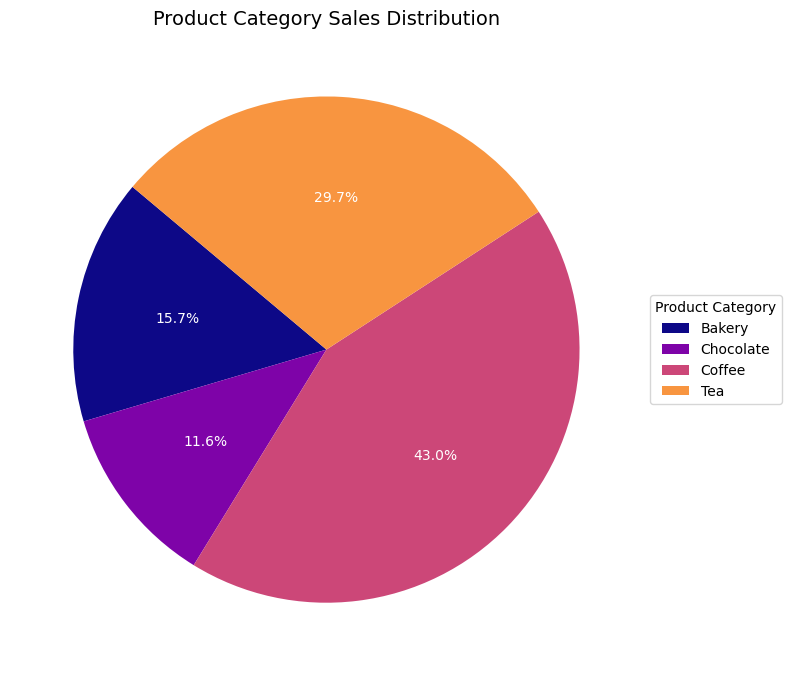

In [69]:
import matplotlib.pyplot as plt

# Data
labels = summary['product_category']
sizes = summary['unit_price']

# Gunakan colormap plasma agar warnanya mirip Plotly
cmap = plt.get_cmap("plasma")
colors = [cmap(i / len(sizes)) for i in range(len(sizes))]

# Buat figure
plt.figure(figsize=(8, 8))

# Buat pie chart tanpa label langsung di pie (untuk gunakan legend)
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=None,  # label akan ditaruh di legend
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'color': 'white'}
)

# Tambahkan legend di luar chart
plt.legend(
    wedges,
    labels,
    title="Product Category",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

# Tambahkan judul
plt.title("Product Category Sales Distribution", fontsize=14)

plt.tight_layout()
plt.show()


Disclaimer: Anggap saja hanya ada 4 kategori yang cabang toko astoria sediakan. Mengenai kategori penjualan gula dan marchendise harap diabaikan.

Penjelasan Pie Chart:

Hasil visualisasi data menggunakan pie chart menampilkan keempat persentase produk berdasarkan kategori. Dari sini kita menemukan bahwa coffee berkontribusi 43% terhadap penjualan produk di cabang toko astoria, sementara penjualan produk tea dan bakery masing masing 29.7% dan 15.7%. Penjualan chocolate berkontribusi paling sedikit dengan persentase 11.6%. Dari hasil ini maka pertanyaan keempat yaitu Berapa persentase penjualan produk chocolate dari seluruh total penjualan bisa dijawab.

**Jawaban:** Persentase penjualan produk chocolate adalah 11.6% dari seluruh total penjualan cabang toko astoria.

===============================================================================================

## 5. Data Visualisasi Trend Penjualan

Pembuatan trend penjualan dari cabang toko astoria dengan menggunakan line chart. Trend penjualan ini berguna untuk melihat di hari apa saja, penjualan meningkat dan dihari apa saja penjualan menurun. Ini berguna untuk tim marketing dalam perancangan strategi promosi di waktu momentum penjualan naik sehingga dapat semakin naik lagi. Langkah ini juga menjelaskan pertanyaan nomor 5 yaitu 

**Bagaimana mengenai trend penjualan produk coffee pada cabang toko Astoria?**


---------------------------------------------------------------------------

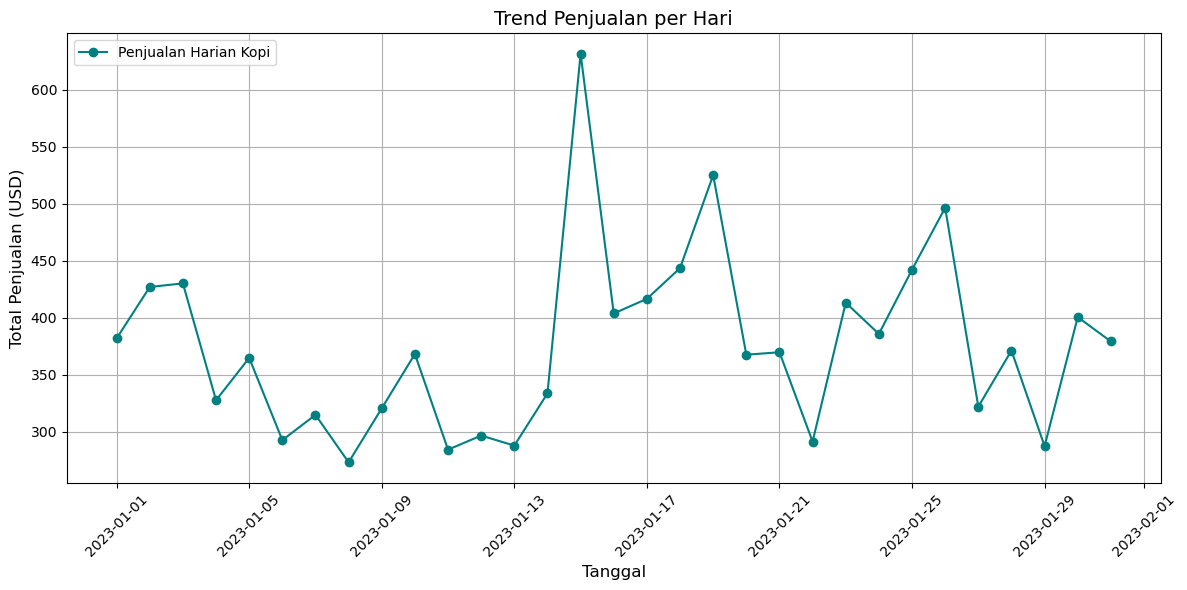

In [70]:
# Pastikan transaction_date adalah datetime
sales_trend['transaction_date'] = pd.to_datetime(sales_trend['transaction_date'])

# Ukuran figure
plt.figure(figsize=(12, 6))

# Plot line dengan label untuk legend
plt.plot(
    sales_trend['transaction_date'],
    sales_trend['total_price'],
    marker='o',
    linestyle='-',
    color='teal',
    label='Penjualan Harian Kopi'  # ← ini akan muncul di legend
)

# Tambahkan legend
plt.legend(loc='upper left')  # kamu bisa ganti dengan: 'upper right', 'lower center', dll.

# Tambahkan judul dan label sumbu
plt.title('Trend Penjualan per Hari', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Total Penjualan (USD)', fontsize=12)

# Rotate x-axis agar tidak tumpang tindih
plt.xticks(rotation=45)

# Tambahkan grid
plt.grid(True)

# Tata letak agar tidak terpotong
plt.tight_layout()
plt.show()


Kesimpulan Line Chart:

Dari langkah ini kita dapat menyimpulkan bahwa pendapatan tertinggi dari penjualan produk coffee pada cabang toko astoria adalah pada tanggal 15 januari 2023 dengan pendapatan USD 631.55, dan terendah yaitu pada tanggal 8 januari 2023 dengan pendapatan USD 273.1. Disini juga saya menemukan trend bahwa selalu ada penaikan sales kopi dari hari jumat ke sabtu.

==============================================================================================================

## 6. Visualisasi Data menggunakan Histogram

Langkah visualisasi menggunakan histogram bertujuan untuk mengetahui penyebaran data produk coffee yang ada di cabang toko astoria. Langkah ini juga menjawab dari pertanyaan keenam yaitu 

**Bagaimana penyebaran data harga kopi di cabang toko astoria?**

---------------------------------------------------------------

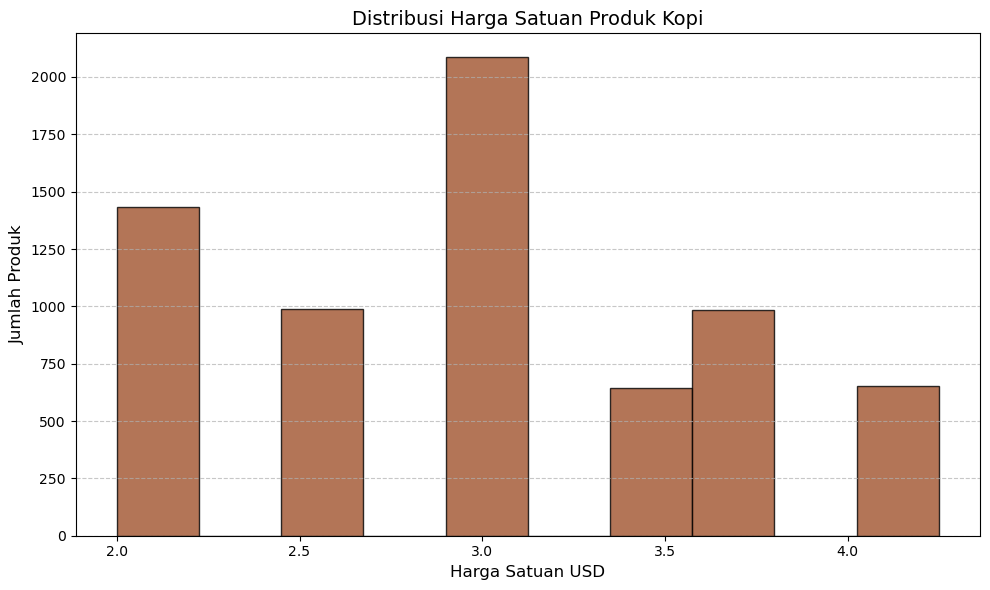

In [71]:
# Ambil hanya kolom harga satuan kopi
unit_prices = df_kopi['unit_price']

# Ukuran figure
plt.figure(figsize=(10, 6))

# Buat histogram
plt.hist(unit_prices, bins=10, color='sienna', edgecolor='black', alpha=0.8)

# Tambahkan judul dan label sumbu
plt.title('Distribusi Harga Satuan Produk Kopi', fontsize=14)
plt.xlabel('Harga Satuan USD', fontsize=12)
plt.ylabel('Jumlah Produk', fontsize=12)

# Tambahkan grid tipis dan sedikit spasi antar bar dengan edgecolor
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tata letak agar tidak terpotong
plt.tight_layout()
plt.show()


**Penjelasan Histogram:**

Penyebaran data harga kopi di cabang toko astoria digambarkan oleh histogram diatas. Penyebaran data dari harga USD 2 hingga 2.49 ada 1736 kali transaksi, lalu dari harga USD 2.5 hingga 2.99 terdapat 687 transaksi. Nilai yang paling banyak adalah dari range USD 3 hingga 3.49 dengan jumlah 2086 traksaksi. Range harga 3.5 hingga 3.99 ada 1630 transaksi. Dan untuk range harga USD 4 hingga 4.5 menjadi transaksi paling sedikit dengan jumlah 652 traksaksi.


---

# KONKLUSI

Berdasarkan Analisa data penjualan produk di cabang Astoria, beberapa temuan berhasil ditemukan:

1. Produk dengan penjualan terendah
Berdasarkan jumlah unit terjual, kategori chocolate adalah yang paling rendah dengan total 772 porudk, jauh dibawah kategori lainnya seperti coffee sebanyak 3494, Tea sebanyak 2830, dan bakery sebanyak 872. Ini menjawab chocolate adalah produk yang paling tidak laku di cabang astoria.

2. Rata - rata nilai traksaksi Tertinggi
Meskipun chocolate adalah yang paling jarang dibeli, namun dari segi rata rata pendapatan per transaksi, coklat justru mencatat angka tertinggi yaitu USD 6.22. Artinya, setiap pembelian chocolate memberikan mergin atau kontribusi pendapatan lebih besar per transaksi dibanding kategori lainnya.

3. Analisa Statistik Inferensial Menggunakan Spearman
Hasil pengujian statistik menunjukkan nilai p_value sebesar 2.24x-121. Dengan nilai p_value yang jauh lebih kecil dari 0.05, maka dapat disimpulkan bahwa tidak ada hubungan yang signifikan antara kategori produk dengan harga produk. Atau dapat dibilang, kategori produk tidak mempengaruhi harga jualnya secara statistik.

4. Distribusi Penjualan menggunakan Pie Chart
Visualisasi pie chart menunjukkan bahwa kontribusi penjualan produk di astoria didominasi oleh:
- Coffee: 43%
- Tea: 29.7%
- Bakery: 15.7%
- Chocolate: 11.6%

Chocolate memiliki kontribusi paling kecil terhadap total penjualan.

5. Tren Penjualan Harian menggunakan line chart
Penjualan coffee mencapai puncaknya pada 15 januari 2023 dengan pendapatan USD 631.55, sedangkan terendah terjadi pada 8 januari 2023 sebesar USD 273.1. Ditemukan pula tren peningkatan penjualan kopi setiap weekend, terutama dari hari jumat ke sabtu yang dapat menjadi insight untuk strategi promosi mingguan.

6. Distribusi Harga menggunakan Histogram
Harga kopi paling sering dijual pada kisaran USD 3.00-3.49 dengan toal 2086 transaksi. Kisaran harga ini bisa menjadi pertimbangan utama dalam strategi harga karena paling sering dipilih oleh konsumen.

Rekomendasi:
- Fokus dalam evaluasi dan inovasi produk pada kategori chocolate, karena meskipun penjualannya rendah, potensinya tinggi berdasarkan nilai per transaksinya. Orang mau spend uang banyak di produk ini dibanding ketiga kategori lainnya. Kalau secara promosi dan rasa dari chocolate jauh lebih meningkat secara kualitas, maka ini akan menjadi salah satu produk yang penjualannya menghasilkan banyak profit. Maka tim yang harus menghandle ini adalah tim pembuatan minuman untuk evaluasi rasa dari minuman chocolate dan tim marketing untuk promosi lebih baik lagi dalam promosi produk chocolate. Tim promosi juga perlu mempertimbangkan seperti bundling produk chocolate di hari sabtu mengingat adanya trend kenaikan konsumen dari hari jumat ke sabtu.

---